In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sklearn as sk

In [2]:
input_1 = 'file_input_uploads/heart_disease_uci.csv'

In [3]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 38.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


### Data Aquisition

In [4]:
# Update the file path to the correct one provided earlier

df = pd.read_csv(input_1)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.shape

(920, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
#basic descriptives 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,920.000,460.500,265.725,1.000,230.750,460.500,690.250,920.000
age,920.000,53.511,9.425,28.000,47.000,54.000,60.000,77.000
trestbps,861.000,132.132,19.066,0.000,120.000,130.000,140.000,200.000
chol,890.000,199.130,110.781,0.000,175.000,223.000,268.000,603.000
thalch,865.000,137.546,25.926,60.000,120.000,140.000,157.000,202.000
oldpeak,858.000,0.879,1.091,-2.600,0.000,0.500,1.500,6.200
ca,309.000,0.676,0.936,0.000,0.000,0.000,1.000,3.000
num,920.000,0.996,1.143,0.000,0.000,1.000,2.000,4.000


### Filtering Dataset

In [8]:
#deleting the ID variable since it is not useful for our analysis
df = df.drop(columns=['id'])
df.shape

(920, 15)

In [9]:
#find missing values
df.isnull()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False
917,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
918,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False


In [15]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


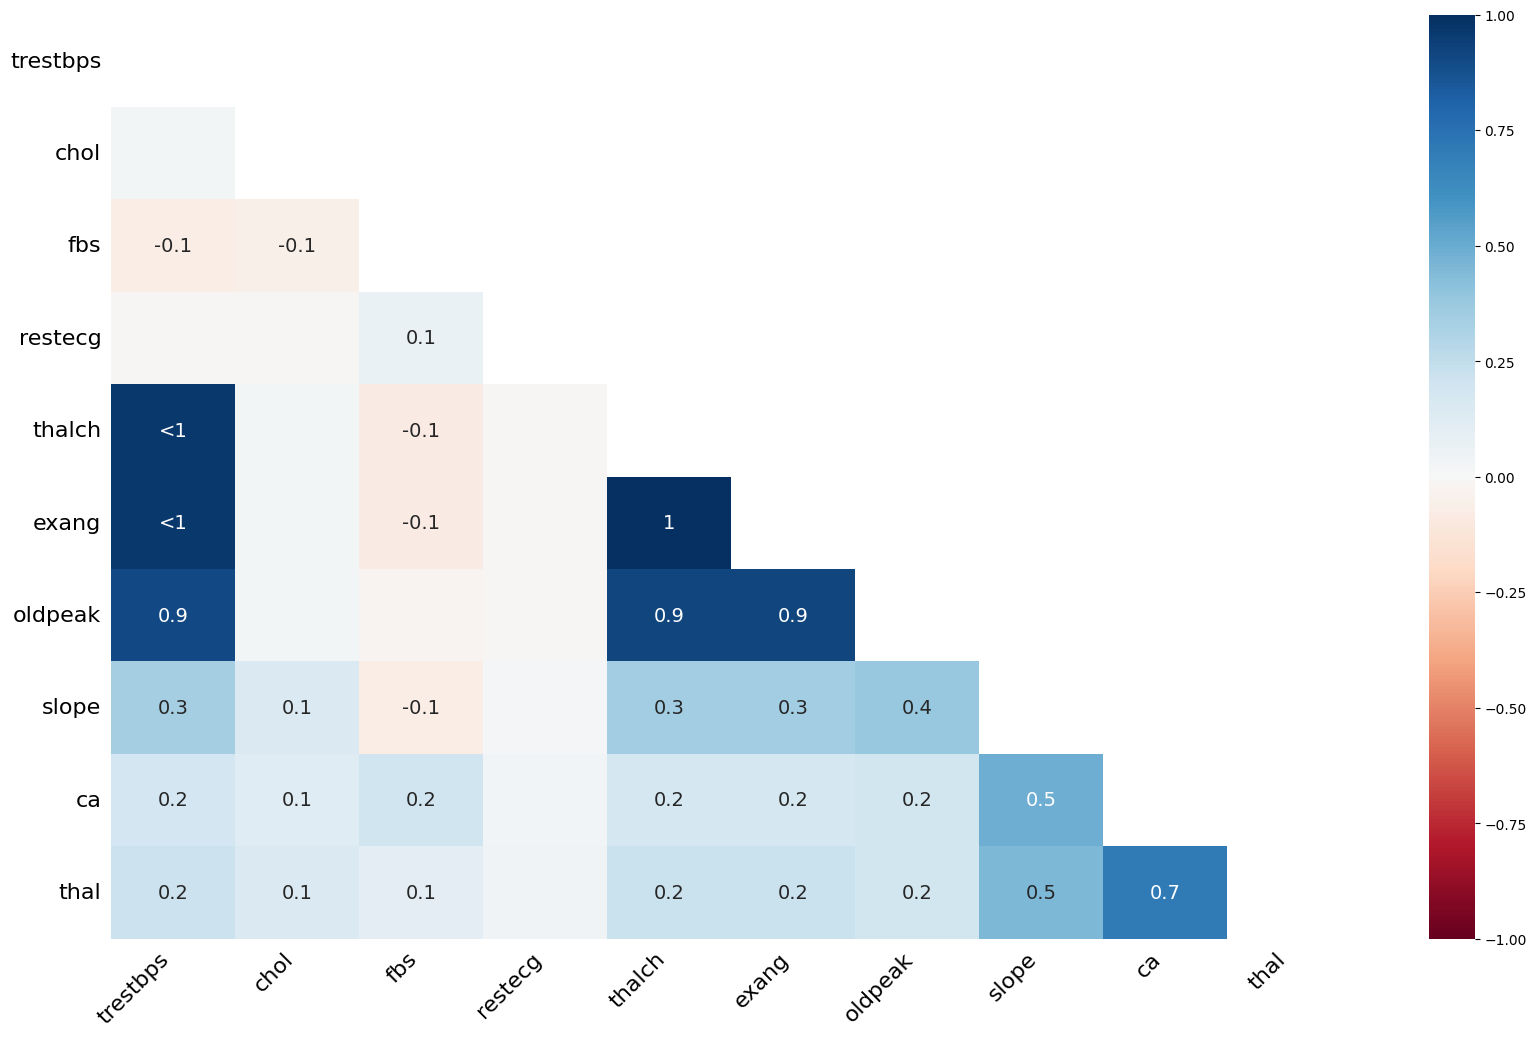

In [13]:
# Fixing the code by installing the missingno package
!pip install missingno

# Now, retry visualizing the missing values
import missingno as msno
msno.heatmap(df)
plt.show()

In [17]:
# Correcting fillna for categorical columns and filling with appropriate values

df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)  # categorical

df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)  # categorical
df['thalch'].fillna(df['thalch'].mean(), inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)  # categorical
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)  # categorical
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)  # categorical

# Check for any remaining missing values
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [18]:
#checking for duplicates 
df.duplicated().sum()

2

In [19]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

### Data Transformation

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   dataset   918 non-null    object 
 3   cp        918 non-null    object 
 4   trestbps  918 non-null    float64
 5   chol      918 non-null    float64
 6   fbs       918 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    918 non-null    float64
 9   exang     918 non-null    object 
 10  oldpeak   918 non-null    float64
 11  slope     918 non-null    object 
 12  ca        918 non-null    float64
 13  thal      918 non-null    object 
 14  num       918 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 114.8+ KB


### Exploratory Data Analysis

In [22]:
# The error occurs because 'groupby' tries to calculate the mean of non-numeric data types. We can select only numeric columns before applying 'groupby'.

df.groupby('sex').mean(numeric_only=True)

,age,trestbps,chol,thalch,oldpeak,ca,num
sex,,,,,,,
Female,52.492,132.209,240.165,146.083,0.673,0.275,0.425
Male,53.782,132.118,188.179,135.269,0.936,0.215,1.148


In [23]:
df.groupby('sex')['num'].mean()

sex
Female   0.425
Male     1.148
Name: num, dtype: float64

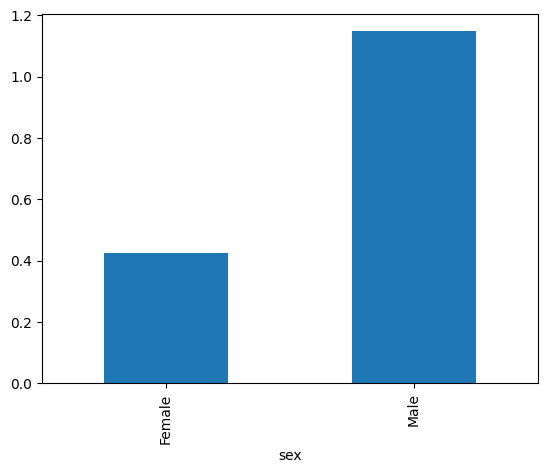

In [24]:
df.groupby('sex')['num'].mean().plot(kind='bar')
plt.show()

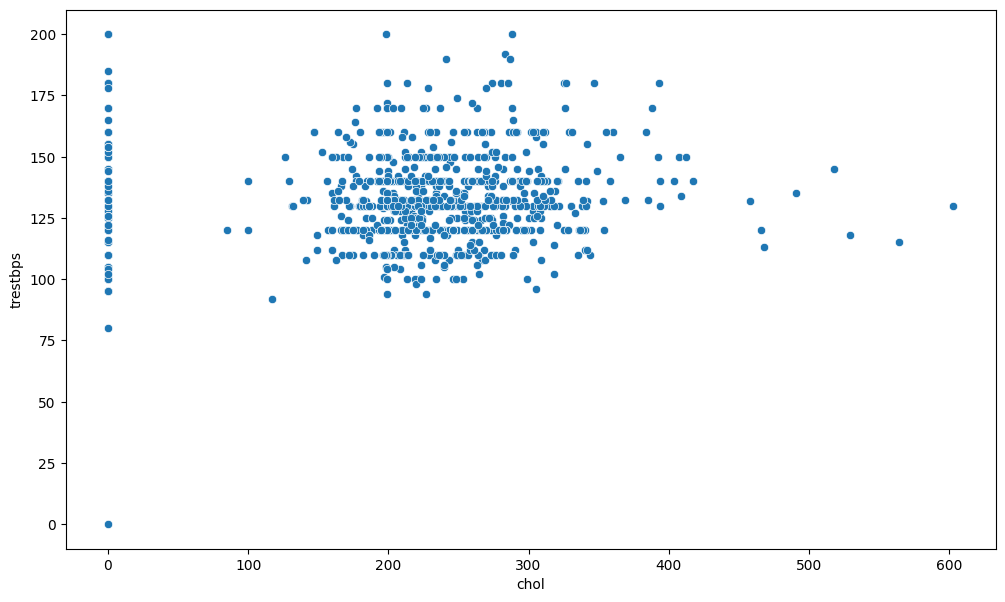

In [27]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='chol', y='trestbps', data=df)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0e222dd4-00a3-4786-aa8b-a269f7a7f431' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>